# Exact solution used in MES runs


We would like to MES the operation (in a cylindrical geometry)

$$
\nabla \cdot \left(\mathbf{u}_E\cdot\nabla \left[\frac{\nabla_\perp \phi}{B}n\right]\right)
$$

As we have a homogenenous $B$-field, we have normalized it out, and remain with

$$
\nabla \cdot \left(\mathbf{u}_E\cdot\nabla\left[n\nabla_\perp \phi\right]\right)
$$

In [1]:
%matplotlib notebook

from IPython.display import display

from sympy import init_printing
from sympy import S, Function, Derivative, Eq
from sympy import symbols, simplify, sympify, collect, expand

from boutdata.mms import x, y, z, t

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../')
# Sys path is a list of system paths
sys.path.append(common_dir)
from MES.common.python.mesGenerator import get_metric

init_printing()

## Initialize

In [2]:
metric = get_metric()
phi = Function('phi')(x,z)
n   = Function('n')  (x,z)

In [3]:
def DDX(f):
    return Derivative(f, x)

def DDZ(f):
    return Derivative(f, z)

## Define the variables

In [4]:
# Initialization
the_vars = {}

### Define functions

One can show that in cylindrical geometry

$$\mathbf{u}_E\cdot\nabla f = \frac{1}{J}(\partial_\theta \phi \partial_\rho f - \partial_\rho \phi \partial_\theta f)$$

Further on, we have that

$$
\partial_\rho   \mathbf{e}^\rho = 0\\
\partial_\theta \mathbf{e}^\rho = \rho\mathbf{e}^\theta\\
\partial_\rho   \mathbf{e}^\theta = -\frac{\mathbf{e}^\theta}{\rho}\\
\partial_\theta \mathbf{e}^\theta = -\frac{\mathbf{e}^\rho}{\rho}
$$

and that

$$
n\nabla_\perp \phi =
\mathbf{e}^\rho n \partial_\rho \phi + \mathbf{e}^\theta n \partial_\theta \phi
$$

This means that one of the components can be written

$$
n\nabla_\perp \phi =\mathbf{e}^j n \partial_j \phi
$$

such that


$$
\partial_i \left( n\nabla_\perp \phi \right) =
  \mathbf{e}^j\partial_i \left(n \partial_j \phi \right)
+ n \partial_j \phi \partial_i \left(\mathbf{e}^j\right)
$$

This gives

\begin{align}
\partial_\rho \left( \left[ n\nabla_\perp \phi \right]_\rho \right) 
&=
  \mathbf{e}^\rho \partial_\rho \left(n \partial_\rho \phi \right)
+ n \partial_\rho \phi \partial_\rho \left(\mathbf{e}^\rho\right)
\\
&=
  \mathbf{e}^\rho \partial_\rho \left(n \partial_\rho \phi \right)
\end{align}

and

\begin{align}
\partial_\rho \left( \left[ n\nabla_\perp \phi \right]_\theta \right) 
&=
  \mathbf{e}^\theta \partial_\rho \left(n \partial_\theta \phi \right)
+ n \partial_\theta \phi \partial_\rho \left(\mathbf{e}^\theta\right)
\\
&=
  \mathbf{e}^\theta \partial_\rho \left(n \partial_\theta \phi \right)
- \frac{\mathbf{e}^\theta}{\rho}n \partial_\theta \phi \partial_\rho
\end{align}

so that

\begin{align}
\partial_\rho \left( n\nabla_\perp \phi \right) 
&=
  \mathbf{e}^\rho \partial_\rho \left(n \partial_\rho \phi \right)
+ \mathbf{e}^\theta \partial_\rho \left(n \partial_\theta \phi \right)
- \frac{\mathbf{e}^\theta}{\rho}n \partial_\theta \phi
\\
&=
  \mathbf{e}^\rho
  \left(
    \partial_\rho \left(n \partial_\rho \phi \right)
  \right)
+ \mathbf{e}^\theta
  \left(
      \partial_\rho \left(n \partial_\theta \phi \right)
    - \frac{1}{\rho}n \partial_\theta \phi
  \right)
\end{align}

Which means that

\begin{align}
\frac{1}{J}\partial_\theta \phi \partial_\rho \left( n\nabla_\perp \phi \right) 
=
  \mathbf{e}^\rho
  \frac{1}{J}\partial_\theta \phi 
  \left(
    \partial_\rho \left(n \partial_\rho \phi \right)
  \right)
+ \mathbf{e}^\theta 
  \frac{1}{J}\partial_\theta \phi 
  \left(
    \partial_\rho \left(n \partial_\theta \phi \right)
  - \frac{1}{\rho}n \partial_\theta \phi
  \right)
\end{align}

Further on, we have that

\begin{align}
\partial_\theta \left( \left[ n\nabla_\perp \phi \right]_\rho \right) 
&=
  \mathbf{e}^\rho \partial_\theta \left(n \partial_\rho \phi \right)
+ n \partial_\rho \phi \partial_\theta \left(\mathbf{e}^\rho\right)
\\
&=
  \mathbf{e}^\rho \partial_\theta \left(n \partial_\rho \phi \right)
+ \rho\mathbf{e}^\theta n \partial_\rho \phi
\end{align}

and

\begin{align}
\partial_\theta \left( \left[ n\nabla_\perp \phi \right]_\theta \right) 
&=
  \mathbf{e}^\theta \partial_\theta \left(n \partial_\theta \phi \right)
+ n \partial_\theta \phi \partial_\theta \left(\mathbf{e}^\theta\right)
\\
&=
  \mathbf{e}^\theta \partial_\theta \left(n \partial_\theta \phi \right)
- \frac{\mathbf{e}^\rho }{\rho} n \partial_\theta \phi
\end{align}

so that

\begin{align}
\partial_\theta \left( n\nabla_\perp \phi \right) 
&=
  \mathbf{e}^\rho \partial_\theta \left(n \partial_\rho \phi \right)
+ \mathbf{e}^\theta \rho n \partial_\rho \phi
+ \mathbf{e}^\theta \partial_\theta \left(n \partial_\theta \phi \right)
- \frac{\mathbf{e}^\rho}{\rho} n \partial_\theta \phi
\\
&=
  \mathbf{e}^\rho
  \left(
     \partial_\theta \left(n \partial_\rho \phi \right)
   - \frac{1}{\rho} n \partial_\theta \phi
  \right)
+ \mathbf{e}^\theta
  \left(
      \rho n \partial_\rho \phi
    + \partial_\theta \left(n \partial_\theta \phi \right)
  \right)
\end{align}

Which means that

\begin{align}
\frac{1}{J}\partial_\rho \phi \partial_\theta \left( n\nabla_\perp \phi \right) 
=
  \mathbf{e}^\rho
  \frac{1}{J}\partial_\rho \phi
  \left(
     \partial_\theta \left(n \partial_\rho \phi \right)
   - \frac{1}{\rho} n \partial_\theta \phi
  \right)
+ \mathbf{e}^\theta 
  \frac{1}{J}\partial_\rho \phi
  \left(
      \rho n \partial_\rho \phi
    + \partial_\theta \left(n \partial_\theta \phi \right)
  \right)
\end{align}

Collecting elements gives

\begin{align}
\mathbf{u}_E\cdot\nabla \left( n\nabla_\perp \phi \right)
=&
\mathbf{e}^\rho
\frac{1}{J}
\left[
  \partial_\theta \phi 
  \partial_\rho \left(n \partial_\rho \phi \right) 
-
   \partial_\rho \phi
   \left(
     \partial_\theta \left(n \partial_\rho \phi \right)
   - \frac{1}{\rho} n \partial_\theta \phi
  \right)
\right]
\\&
+ 
\mathbf{e}^\theta 
\frac{1}{J}
\left[
  \partial_\theta \phi 
    \left(
      \partial_\rho \left(n \partial_\theta \phi \right)
    - \frac{1}{\rho}n \partial_\theta \phi
    \right) 
-
  \partial_\rho \phi
    \left(
        \rho n \partial_\rho \phi
      + \partial_\theta \left(n \partial_\theta \phi \right)
    \right)
\right]
\end{align}

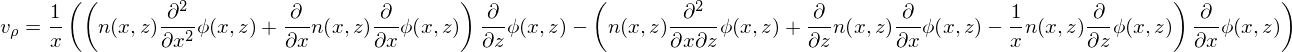

In [5]:
rho_element = (1/metric.J)*(
                              DDZ(phi)*
                              DDX(n*DDX(phi))
                            -
                              DDX(phi)*
                              (
                                DDZ(n*DDX(phi))
                                - (1/metric.J)*n*DDZ(phi)
                              )
                            )
display(Eq(symbols('v_rho'), rho_element.doit()))

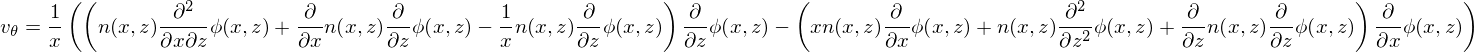

In [6]:
theta_element = (1/metric.J)*(
                        DDZ(phi)*
                        (
                               DDX(n * DDZ(phi))
                            - (1/metric.J) * n * DDZ(phi)
                        ) 
                        -
                        DDX(phi)*
                        (
                            metric.J*n*DDX(phi)
                            + DDZ(n*DDZ(phi)) 
                        )
                    )

display(Eq(symbols('v_theta'), theta_element.doit()))

We have that

$$
\nabla \cdot \mathbf{A} = \frac{1}{J}\partial_i (J A^i)
$$

And that 

$$
A^i = g^{ij}A_j
$$

Since

$$
g^{ij} = 0 \iff i\neq j\\
g^{\rho\rho} =1 \\
g^{\theta\theta} = \frac{1}{\rho^2}
$$

This means that

$$
\nabla \cdot \mathbf{A}_\perp
=   \frac{1}{J}\partial_i \left(Jg^{ik}A_k\right)
=   \frac{1}{\rho}\partial_\rho \left(\rho A_\rho\right)
  + \frac{1}{\rho}\partial_\theta \left(\frac{1}{\rho}A_\rho\right)
$$

so that

$$
\nabla \cdot \left(\mathbf{u}_E\cdot\nabla\left[n\nabla_\perp \phi\right]\right)
$$

can be written

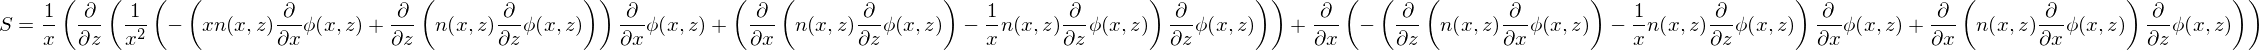

In [7]:
S = (1/metric.J)*(
      DDX(metric.J*rho_element)
    + DDZ((1/metric.J)*theta_element)
    )

display(Eq(symbols('S'), S))

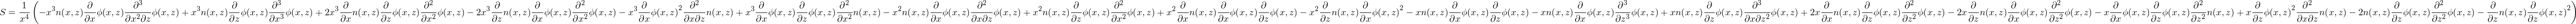

In [8]:
S = simplify(S.doit())

display(Eq(symbols('S'), S))

Well, that is a mess, we should collect it another manner

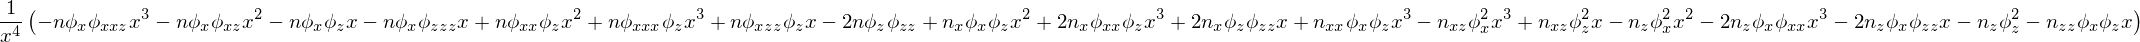

In [9]:
strS = str(S)

# phi x derivatives
strS = strS.replace('Derivative(phi(x, z), x)', 'phi_x')
strS = strS.replace('Derivative(phi(x, z), x, x)', 'phi_xx')
strS = strS.replace('Derivative(phi(x, z), x, x, x)', 'phi_xxx')
# phi z derivatives
strS = strS.replace('Derivative(phi(x, z), z)', 'phi_z')
strS = strS.replace('Derivative(phi(x, z), z, z)', 'phi_zz')
strS = strS.replace('Derivative(phi(x, z), z, z, z)', 'phi_zzz')
# phi mixed derivatives
strS = strS.replace('Derivative(phi(x, z), x, z)', 'phi_xz')
strS = strS.replace('Derivative(phi(x, z), x, z, z)', 'phi_xzz')
strS = strS.replace('Derivative(phi(x, z), x, x, z)', 'phi_xxz')
# Non-derivatives
strS = strS.replace('phi(x, z)', 'phi')


# n x derivatives
strS = strS.replace('Derivative(n(x, z), x)', 'n_x')
strS = strS.replace('Derivative(n(x, z), x, x)', 'n_xx')
# n z derivatives
strS = strS.replace('Derivative(n(x, z), z)', 'n_z')
strS = strS.replace('Derivative(n(x, z), z, z)', 'n_zz')
# n mixed derivatives
strS = strS.replace('Derivative(n(x, z), x, z)', 'n_xz')
# Non-derivatives
strS = strS.replace('n(x, z)', 'n')

newS = sympify(strS)
display(newS)

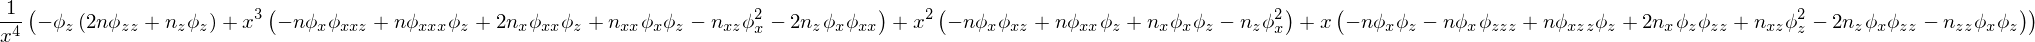

In [10]:
display(simplify(expand(newS)))

## Printing for comparison

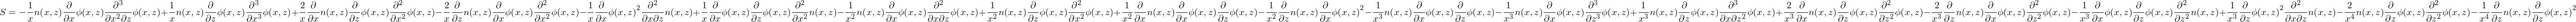

In [11]:
display(Eq(symbols('S'), expand(S)))

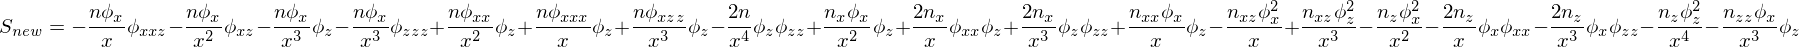

In [12]:
display(Eq(symbols('S_new'), expand(newS)))

## Port to BOUT++

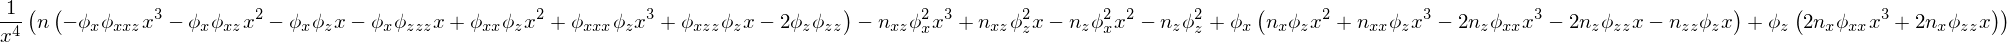

In [13]:
newerS = collect(newS, symbols('n, phi_x, phi_z'), exact=True)
display(newerS)

In [14]:
print(newerS)

(n*(-phi_x*phi_xxz*x**3 - phi_x*phi_xz*x**2 - phi_x*phi_z*x - phi_x*phi_zzz*x + phi_xx*phi_z*x**2 + phi_xxx*phi_z*x**3 + phi_xzz*phi_z*x - 2*phi_z*phi_zz) - n_xz*phi_x**2*x**3 + n_xz*phi_z**2*x - n_z*phi_x**2*x**2 - n_z*phi_z**2 + phi_x*(n_x*phi_z*x**2 + n_xx*phi_z*x**3 - 2*n_z*phi_xx*x**3 - 2*n_z*phi_zz*x - n_zz*phi_z*x) + phi_z*(2*n_x*phi_xx*x**3 + 2*n_x*phi_zz*x))/x**4


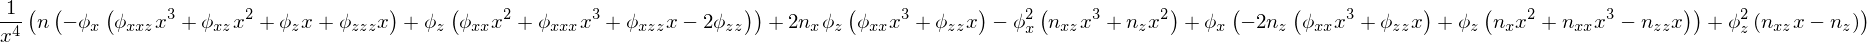

In [15]:
# Manual simplification
manSim = (sympify(\
'(  n*(-phi_x*(phi_xxz*x**3  + phi_xz*x**2  + phi_z*x   + phi_zzz*x) + phi_z*(phi_xx*x**2 + phi_xxx*x**3 + phi_xzz*x - 2*phi_zz)) - phi_x**2*(n_xz*x**3 + n_z*x**2) + phi_z**2*(n_xz*x - n_z) + phi_x*(  phi_z*(n_x*x**2 + n_xx*x**3- n_zz*x) - 2*n_z*(phi_xx*x**3 + phi_zz*x)) + 2*n_x*phi_z*(phi_xx*x**3 + phi_zz*x))/x**4'
    ))
display(manSim)

In [16]:
display(expand(newerS)- expand(manSim))